<a href="https://colab.research.google.com/github/Mubassir1820/Kaggle_competition/blob/Advanced-regression/Kaggle_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# For local run
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

# For Kaggle run
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Extract target column, the y
target = train.columns.to_list()[-1]
train_target = train[target]

# Extract Id column, then drop it
train_id = train['UID']
test_id = test['UID']
train.drop('UID', axis=1, inplace=True)
test.drop('UID', axis=1, inplace=True)

# Set random seed
random_seed = 1

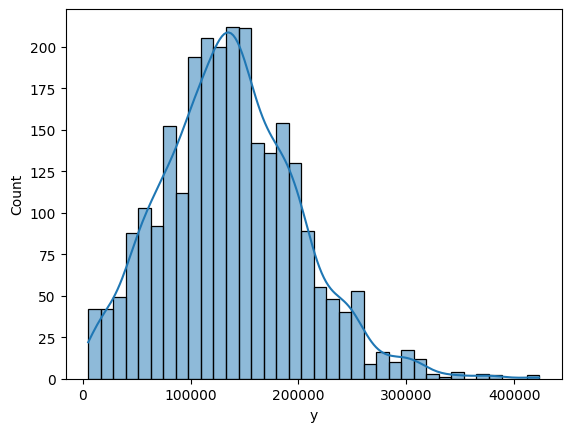

Skewness:  0.4443
Kurtosis:  0.4873


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

sns.histplot(train[target], kde=True)
plt.show()
print('Skewness: ', f'{train[target].skew():.4f}')
print('Kurtosis: ', f'{train[target].kurt():.4f}')

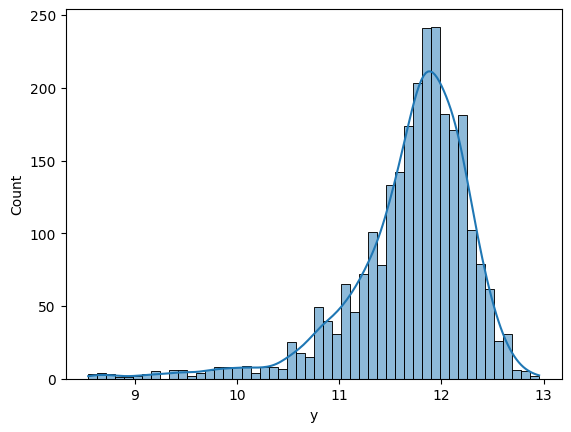

Skewness:  -1.6665
Kurtosis:  4.4123


In [110]:
# Convert target column to log1p, for lower skewness and better performance
train_target = np.log1p(train_target)
train.drop(target, axis=1, inplace=True)
sns.histplot(train_target, kde=True)
plt.show()
print('Skewness: ', f'{train_target.skew():.4f}')
print('Kurtosis: ', f'{train_target.kurt():.4f}')

In [111]:
# Combine train and test data into one dataframe
combined = pd.concat([train, test], axis=0)

In [112]:
combined.head(10)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,A 0,B0,C2,D1,100,E1,F2
1,A1,B0,C11,D4,100,E4,F2
2,A0,B0,C18,D0,0,E0,F2
3,A2,B0,C11,D1,100,E1,F2
4,A0,B0,C67,D1,0,E1,F2
5,A0,B0,C11,D1,100,E1,F2
6,AO,B0,C11,D1,100,E1,F0
7,A0,B0,C4,D1,0,E1,F2
8,A0,B0,C2,D1,100,E1,F2
9,A0,B0,C2,D1,100,E1,F2


In [113]:
combined.shape

(3755, 7)

In [114]:
combined['col_0'].value_counts()

A0        2160
A1         691
A2         275
A3          98
 A0         70
A 0         56
AO          50
A0          49
A 1         26
 A1         21
A1          20
 A2          9
A 2          9
A2           6
 A3          4
A 3          3
A   3        2
Name: col_0, dtype: int64

In [115]:
combined['col_1'].value_counts()

B0        3396
 B0         61
B 0         50
B0          48
BO          44
B3          16
B2           9
B1           9
B   3        1
B1           1
Name: col_1, dtype: int64

In [116]:
combined['col_2'].value_counts()

C11    1040
C2      840
C4      612
C9      289
C7      103
C15     101
C18      82
C26      58
C3       58
C6       37
C1       34
C27      29
C34      26
C50      24
C19      22
C12      18
C36      16
C20      15
C53      15
C30      14
C46      13
C38      12
C17      11
C52      11
C29      11
C33      11
C45      10
C21      10
C85      10
C25      10
C57      10
C54       9
C39       9
C49       9
C47       8
C0        8
C13       7
C69       7
C67       7
C42       6
C72       6
C87       6
C56       6
C28       6
C31       5
C60       5
C65       5
C40       5
C59       5
C70       4
C8        4
C35       4
C66       4
C78       4
C77       3
C83       3
C41       3
C84       3
C63       2
C37       2
C89       2
C10       2
C5        2
C79       2
C58       2
C64       2
C76       2
C44       2
C51       2
C23       2
C55       2
C73       2
C43       2
C16       2
C90       2
C91       1
C80       1
C74       1
C75       1
C14       1
C92       1
C88       1
C68       1
C82 

In [117]:
combined['col_3'].value_counts()

D1     3004
D4      167
D2       85
D0       80
D6       71
D3       48
D12      38
D26      18
D8       18
D37      16
D9       15
D13      11
D24      10
D41       8
D42       8
D5        7
D16       7
D64       7
D33       6
D19       6
D29       6
D21       5
D45       5
D55       5
D53       5
D39       4
D68       4
D10       4
D15       4
D23       4
D20       4
D56       3
D48       3
D28       3
D31       3
D27       3
D57       3
D40       3
D62       3
D11       2
D18       2
D44       2
D25       2
D14       2
D7        2
D36       2
D54       2
D51       2
D46       2
D22       2
D58       2
D74       1
D52       1
D17       1
D35       1
D63       1
D69       1
D43       1
D61       1
D67       1
D73       1
D65       1
D50       1
D49       1
D71       1
D32       1
D34       1
D72       1
D30       1
D47       1
D59       1
D76       1
D60       1
D75       1
D66       1
D77       1
D38       1
D70       1
Name: col_3, dtype: int64

In [118]:
combined['col_5'].value_counts()

E1     3040
E4      172
E2       87
E0       77
E6       58
E3       56
E11      34
E23      15
E24      14
E19      14
E33      14
E8       13
E22      10
E14       7
E64       6
E18       6
E49       6
E9        5
E52       5
E40       5
E5        5
E13       4
E35       4
E54       4
E17       4
E53       4
E57       4
E38       4
E37       4
E21       4
E60       3
E26       3
E25       3
E44       3
E42       3
E27       3
E12       3
E61       3
E51       3
E58       2
E16       2
E32       2
E36       2
E20       2
E15       2
E43       2
E29       2
E48       2
E10       2
E31       1
E41       1
E62       1
E63       1
E50       1
E39       1
E65       1
E55       1
E68       1
E47       1
E46       1
E69       1
E70       1
E45       1
E56       1
E59       1
E67       1
E71       1
E34       1
E30       1
E28       1
E7        1
E66       1
Name: col_5, dtype: int64

In [119]:
combined['col_6'].value_counts()

F2        2842
F0         409
F1         133
F2          59
F 2         59
 F2         53
 F0         13
F 0          9
F0           7
FO           4
F 1          4
F1           2
 F1          1
Name: col_6, dtype: int64

In [120]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 1126
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col_0   3549 non-null   object
 1   col_1   3635 non-null   object
 2   col_2   3755 non-null   object
 3   col_3   3755 non-null   object
 4   col_4   3755 non-null   int64 
 5   col_5   3755 non-null   object
 6   col_6   3595 non-null   object
dtypes: int64(1), object(6)
memory usage: 234.7+ KB


In [121]:
combined.describe()

,col_4
count,3755.000000
mean,46.271638
std,48.589050
min,0.000000
25%,0.000000
50%,0.000000
75%,100.000000
max,100.000000


In [122]:
combined.value_counts()

col_0   col_1   col_2  col_3  col_4  col_5  col_6 
A0      B0      C11    D1     0      E1     F2        259
                C2     D1     100    E1     F2        191
                C11    D1     100    E1     F2        187
                C2     D1     0      E1     F2        186
                C4     D1     0      E1     F2        124
                              100    E1     F2        117
                C9     D1     0      E1     F2         86
A1      B0      C11    D1     0      E1     F2         61
                C4     D1     0      E1     F2         57
A0      B0      C15    D1     100    E1     F2         34
                C9     D1     100    E1     F2         33
A2      B0      C11    D1     0      E1     F2         29
A0      B0      C7     D1     100    E1     F2         25
                              0      E1     F2         24
A3      B0      C11    D1     100    E1     F2         24
A1      B0      C11    D1     100    E1     F2         24
A0      B0      C18  

In [123]:
combined.isnull().sum()


col_0    206
col_1    120
col_2      0
col_3      0
col_4      0
col_5      0
col_6    160
dtype: int64

In [124]:
# Replace the missing values with mode
combined['col_0'].fillna(combined['col_0'].mode()[0], inplace=True)
combined['col_1'].fillna(combined['col_1'].mode()[0], inplace=True)
combined['col_6'].fillna(combined['col_6'].mode()[0], inplace=True)

In [125]:
combined.isnull().sum()

col_0    0
col_1    0
col_2    0
col_3    0
col_4    0
col_5    0
col_6    0
dtype: int64

In [126]:
# Regular expression to clean the data
import re

def preprocess(text):
  text = re.sub('[a-z^\s]','',text)
  return text

In [127]:
combined['col_0'] = combined['col_0'].map(preprocess)

In [128]:
combined['col_0'].value_counts()

A0    2541
A1     758
A2     299
A3     107
AO      50
Name: col_0, dtype: int64

In [129]:
combined['col_1'] = combined['col_1'].map(preprocess)

In [130]:
combined['col_1'].value_counts()

B0    3675
BO      44
B3      17
B1      10
B2       9
Name: col_1, dtype: int64

In [131]:
combined['col_6'] = combined['col_6'].map(preprocess)

In [132]:
combined['col_6'].value_counts()

F2    3173
F0     438
F1     140
FO       4
Name: col_6, dtype: int64

In [133]:
combined.head(10)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,A0,B0,C2,D1,100,E1,F2
1,A1,B0,C11,D4,100,E4,F2
2,A0,B0,C18,D0,0,E0,F2
3,A2,B0,C11,D1,100,E1,F2
4,A0,B0,C67,D1,0,E1,F2
5,A0,B0,C11,D1,100,E1,F2
6,AO,B0,C11,D1,100,E1,F0
7,A0,B0,C4,D1,0,E1,F2
8,A0,B0,C2,D1,100,E1,F2
9,A0,B0,C2,D1,100,E1,F2


In [134]:
# Count encoding of column 2, 3 , 5, 6, 0, 1
count_encoding1 = combined['col_2'].value_counts().to_dict()
combined['col_2_count_encoded'] = combined['col_2'].map(count_encoding1)

count_encoding2 = combined['col_3'].value_counts().to_dict()
combined['col_3_count_encoded'] = combined['col_3'].map(count_encoding2)

count_encoding3 = combined['col_5'].value_counts().to_dict()
combined['col_5_count_encoded'] = combined['col_5'].map(count_encoding3)

count_encoding4 = combined['col_0'].value_counts().to_dict()
combined['col_0_count_encoded'] = combined['col_0'].map(count_encoding4)

count_encoding5 = combined['col_1'].value_counts().to_dict()
combined['col_1_count_encoded'] = combined['col_1'].map(count_encoding5)

count_encoding6 = combined['col_6'].value_counts().to_dict()
combined['col_6_count_encoded'] = combined['col_6'].map(count_encoding6)

In [135]:
combined.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_2_count_encoded,col_3_count_encoded,col_5_count_encoded,col_0_count_encoded,col_1_count_encoded,col_6_count_encoded
0,A0,B0,C2,D1,100,E1,F2,840,3004,3040,2541,3675,3173
1,A1,B0,C11,D4,100,E4,F2,1040,167,172,758,3675,3173
2,A0,B0,C18,D0,0,E0,F2,82,80,77,2541,3675,3173
3,A2,B0,C11,D1,100,E1,F2,1040,3004,3040,299,3675,3173
4,A0,B0,C67,D1,0,E1,F2,7,3004,3040,2541,3675,3173


In [136]:
# Drop the uid column
columns_to_drop = ['col_2', 'col_3', 'col_5','col_0', 'col_1', 'col_6']
combined = combined.drop(columns = columns_to_drop)

In [137]:
combined.head()

,col_4,col_2_count_encoded,col_3_count_encoded,col_5_count_encoded,col_0_count_encoded,col_1_count_encoded,col_6_count_encoded
0,100,840,3004,3040,2541,3675,3173
1,100,1040,167,172,758,3675,3173
2,0,82,80,77,2541,3675,3173
3,100,1040,3004,3040,299,3675,3173
4,0,7,3004,3040,2541,3675,3173


In [138]:
# Get the train set back
train = combined.iloc[:-len(test_id), :]
test = combined.iloc[-len(test_id):, :]
train[target] = train_target

In [139]:
train.head()

,col_4,col_2_count_encoded,col_3_count_encoded,col_5_count_encoded,col_0_count_encoded,col_1_count_encoded,col_6_count_encoded,y
0,100,840,3004,3040,2541,3675,3173,12.375820
1,100,1040,167,172,758,3675,3173,11.364356
2,0,82,80,77,2541,3675,3173,12.038843
3,100,1040,3004,3040,299,3675,3173,10.968216
4,0,7,3004,3040,2541,3675,3173,12.367345


In [140]:
# Dataset splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(target, axis=1), train[target], test_size=0.25, random_state=random_seed)
# Only works for lazypredict, not used in cross validation

In [141]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [142]:
import xgboost as xgb
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=100,   # Number of trees (boosting rounds)
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,        # Maximum depth of each tree
    random_state=42     # Seed for reproducibility
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [143]:
# List the features by their importance
pd.set_option('display.max_rows', None)
model.fit(train.drop(target, axis=1), train[target])
feature_importance = pd.DataFrame({'feature': train.drop(target, axis=1).columns, 'importance': model.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importance)

               feature  importance
2  col_3_count_encoded    0.498636
4  col_0_count_encoded    0.144537
3  col_5_count_encoded    0.135803
1  col_2_count_encoded    0.074385
6  col_6_count_encoded    0.067826
5  col_1_count_encoded    0.050711
0                col_4    0.028101


In [144]:
#make prediction
y_pred = model.predict(X_test)

In [145]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.13817995160684157
Root Mean Squared Error: 0.37172564023327953
R-squared: 0.6291680977916972


In [146]:
#Hyperparameter tuning and cross validation
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [147]:
print(best_params)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [148]:
# # Prediction on test data
# test_data = pd.read_csv('test.csv')
# test_data.head()

In [149]:
# test_data.isnull().sum()

In [150]:
# # Replace the missing values with mode
# test_data['col_0'].fillna(test_data['col_0'].mode()[0], inplace=True)
# test_data['col_1'].fillna(test_data['col_1'].mode()[0], inplace=True)
# test_data['col_6'].fillna(test_data['col_6'].mode()[0], inplace=True)

In [151]:
# test_data.isnull().sum()

In [152]:
# test_data.shape, df.shape

In [153]:
# test_data['col_0'].value_counts()

In [154]:
# test_data['col_1'].value_counts()

In [155]:
# test_data['col_2'].value_counts()

In [156]:
# test_data['col_3'].value_counts()

In [157]:
# test_data['col_4'].value_counts()

In [158]:
# test_data['col_5'].value_counts()

In [159]:
# test_data['col_6'].value_counts()

In [160]:
# # preprocess with the function preprocess
# test_data['col_0'] = test_data['col_0'].map(preprocess)

In [161]:
# test_data['col_0'].value_counts()

In [162]:
# test_data['col_1'] = test_data['col_1'].map(preprocess)

In [163]:
# test_data['col_1'].value_counts()

In [164]:
# test_data['col_6'] = test_data['col_6'].map(preprocess)

In [165]:
# test_data['col_6'].value_counts()

In [166]:
# Encoding the categorical variables using one hot and count encoding
# test_data = pd.get_dummies(test_data, columns = ['col_0','col_1','col_6'])

In [167]:
# test_data

In [168]:
# # Count encoding of column 2, 3 , 5
# count_encoding1 = test_data['col_2'].value_counts().to_dict()
# test_data['col_2_count_encoded'] = test_data['col_2'].map(count_encoding1)

# count_encoding2 = test_data['col_3'].value_counts().to_dict()
# test_data['col_3_count_encoded'] = test_data['col_3'].map(count_encoding2)

# count_encoding3 = test_data['col_5'].value_counts().to_dict()
# test_data['col_5_count_encoded'] = test_data['col_5'].map(count_encoding3)

# count_encoding4 = test_data['col_0'].value_counts().to_dict()
# test_data['col_0_count_encoded'] = test_data['col_0'].map(count_encoding4)

# count_encoding5 = test_data['col_1'].value_counts().to_dict()
# test_data['col_1_count_encoded'] = test_data['col_1'].map(count_encoding5)

# count_encoding6 = test_data['col_6'].value_counts().to_dict()
# test_data['col_6_count_encoded'] = test_data['col_6'].map(count_encoding6)

In [169]:
# test_data

In [170]:
# test = test_data.drop(columns = ['UID','col_2','col_3','col_5', 'col_0', 'col_1', 'col_6'])

In [171]:
# test

In [172]:
# X

In [173]:
predictions = model.predict(test)

In [174]:
submission = pd.DataFrame({'UID': test_id, target: predictions})

In [175]:
submission

,UID,y
0,2628,11.932524
1,2629,11.922972
2,2630,11.932524
3,2631,12.146854
4,2632,11.932524
5,2633,11.934971
6,2634,11.922972
7,2635,10.920945
8,2636,11.894146
9,2637,12.044704


In [176]:
submission.to_csv('sample_submission2.csv', index = None)

In [177]:
pd.read_csv('sample_submission2.csv')

,UID,y
0,2628,11.932524
1,2629,11.922972
2,2630,11.932524
3,2631,12.146854
4,2632,11.932524
5,2633,11.934971
6,2634,11.922972
7,2635,10.920945
8,2636,11.894146
9,2637,12.044704


In [178]:
# submission = test.add('UID')
# submission

In [179]:
# submission['y'] = predictions

In [180]:
# submission

In [181]:
# submission.to_csv('sample_submission1.csv', index = None)

In [182]:
# pd.read_csv('sample_submission1.csv')